## Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB

## Load the Dataset

In [4]:
data = pd.read_csv(r"C:\Users\OMAR\Desktop\TTU\Data Mininng project\projjject\projjject\Project_Data_Mining\Telco-Customer-Churn.csv")

In [5]:
data.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data['TotalCharges'].tail()

7038    1990.5
7039    7362.9
7040    346.45
7041     306.6
7042    6844.5
Name: TotalCharges, dtype: object

## Data Preprocessing

### 1. Handle missing values

In [10]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [11]:
imputer = SimpleImputer(strategy='median')
data['TotalCharges'] = imputer.fit_transform(data[['TotalCharges']])

### 2. Encode categorical variables

In [13]:
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [15]:
data.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,820.50,1
6,1452-KIOVK,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,89.10,1949.40,0
7,6713-OKOMC,0,0,0,0,10,0,1,0,2,...,0,0,0,0,0,0,3,29.75,301.90,0
8,7892-POOKP,0,0,1,0,28,1,2,1,0,...,2,2,2,2,0,1,2,104.80,3046.05,1
9,6388-TABGU,1,0,0,1,62,1,0,0,2,...,0,0,0,0,1,0,0,56.15,3487.95,0


### 3. Normalize Numerical Features

In [17]:
scaler = StandardScaler()
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

### 4. Feature Selection

In [19]:
X = data.drop(columns=['customerID', 'Churn'])  # Features
Y = data['Churn']  # Target

In [20]:
feature_importance = mutual_info_classif(X, Y)
feature_importance_series = pd.Series(feature_importance, index=X.columns)
print("Feature Importance:\n", feature_importance_series.sort_values(ascending=False))

Feature Importance:
 Contract            0.103016
tenure              0.069488
TechSupport         0.061898
InternetService     0.059476
OnlineSecurity      0.054384
OnlineBackup        0.054038
DeviceProtection    0.049595
TotalCharges        0.042912
MonthlyCharges      0.042908
StreamingTV         0.040705
PaymentMethod       0.039973
StreamingMovies     0.030410
PaperlessBilling    0.024925
Dependents          0.023908
Partner             0.007487
MultipleLines       0.005540
SeniorCitizen       0.003999
PhoneService        0.000000
gender              0.000000
dtype: float64


### 5. Train-Test Split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 6. Handle Class Imbalance using SMOTE

In [24]:
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

## Modeling

### 1) Decision Tree

#### 1. Model Training

In [28]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

#### 2. Model Evaluation

In [30]:
Y_pred_dt = model.predict(X_test)
dt_accuracy = accuracy_score(Y_test, Y_pred_dt)
dt_precision = precision_score(Y_test, Y_pred_dt)
dt_recall = recall_score(Y_test, Y_pred_dt)
dt_f1 = f1_score(Y_test, Y_pred_dt)

print("Decision Tree Performance:")
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall:.2f}")
print(f"F1 Score: {dt_f1:.2f}")

Decision Tree Performance:
Accuracy: 0.70
Precision: 0.45
Recall: 0.58
F1 Score: 0.51


#### 3. Confusion Matrix Visualization

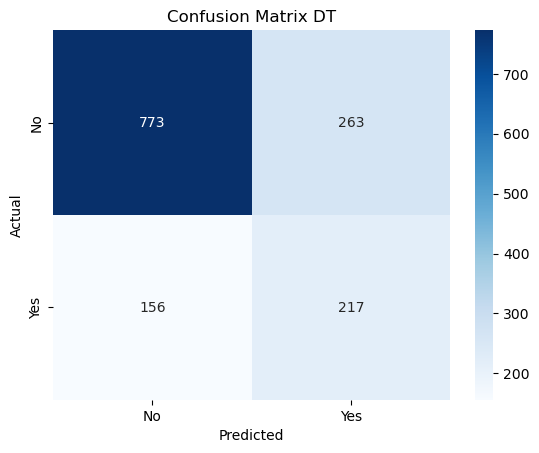

In [32]:
conf_matrix = confusion_matrix(Y_test, Y_pred_dt)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix DT')
plt.show()

#### 4. show Model (Decision Tree)

### 2) Naive Bayes

#### 1. Model Training

In [36]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

#### 2. Model Evaluation

In [38]:
Y_pred_nb = nb_model.predict(X_test)
nb_accuracy = accuracy_score(Y_test, Y_pred_nb)
nb_precision = precision_score(Y_test, Y_pred_nb, average='weighted')
nb_recall = recall_score(Y_test, Y_pred_nb, average='weighted')
nb_f1 = f1_score(Y_test, Y_pred_nb, average='weighted')

print("Naive Bayes Performance:")
print(f"Accuracy: {nb_accuracy:.2f}")
print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")
print(f"F1 Score: {nb_f1:.2f}")

Naive Bayes Performance:
Accuracy: 0.74
Precision: 0.81
Recall: 0.74
F1 Score: 0.76


#### 3. Confusion Matrix Visualization

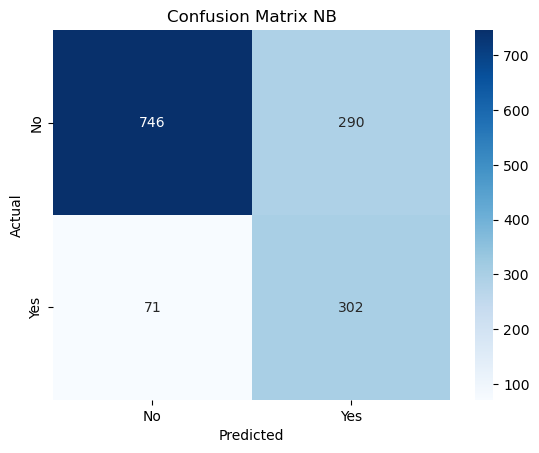

In [40]:
conf_matrix = confusion_matrix(Y_test, Y_pred_nb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix NB')
plt.show()

## Comparison 


In [42]:
comparison_df = pd.DataFrame({ "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
                               "Decision Tree": [dt_accuracy, dt_precision, dt_recall, dt_f1],
                               "Naive Bayes": [nb_accuracy, nb_precision, nb_recall, nb_f1] })

print("Performance Comparison:")
print(comparison_df)

Performance Comparison:
      Metric  Decision Tree  Naive Bayes
0   Accuracy       0.702626     0.743790
1  Precision       0.452083     0.806422
2     Recall       0.581769     0.743790
3   F1 Score       0.508792     0.757722
